# Loan predictions

## Problem Statement

We want to automate the loan eligibility process based on customer details that are provided as online application forms are being filled. You can find the dataset [here](https://drive.google.com/file/d/1h_jl9xqqqHflI5PsuiQd_soNYxzFfjKw/view?usp=sharing). These details concern the customer's Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and other things as well. 

|Variable| Description|
|: ------------- |:-------------|
|Loan_ID| Unique Loan ID|
|Gender| Male/ Female|
|Married| Applicant married (Y/N)|
|Dependents| Number of dependents|
|Education| Applicant Education (Graduate/ Under Graduate)|
|Self_Employed| Self employed (Y/N)|
|ApplicantIncome| Applicant income|
|CoapplicantIncome| Coapplicant income|
|LoanAmount| Loan amount in thousands|
|Loan_Amount_Term| Term of loan in months|
|Credit_History| credit history meets guidelines|
|Property_Area| Urban/ Semi Urban/ Rural|
|Loan_Status| Loan approved (Y/N)



### Explore the problem in following stages:

1. Hypothesis Generation – understanding the problem better by brainstorming possible factors that can impact the outcome
2. Data Exploration – looking at categorical and continuous feature summaries and making inferences about the data.
3. Data Cleaning – imputing missing values in the data and checking for outliers
4. Feature Engineering – modifying existing variables and creating new ones for analysis
5. Model Building – making predictive models on the data

## 1. Hypothesis Generation

Generating a hypothesis is a major step in the process of analyzing data. This involves understanding the problem and formulating a meaningful hypothesis about what could potentially have a good impact on the outcome. This is done BEFORE looking at the data, and we end up creating a laundry list of the different analyses which we can potentially perform if data is available.

#### Possible hypotheses
Which applicants are more likely to get a loan

1. Applicants having a credit history 
2. Applicants with higher applicant and co-applicant incomes
3. Applicants with higher education level
4. Properties in urban areas with high growth perspectives

Do more brainstorming and create some hypotheses of your own. Remember that the data might not be sufficient to test all of these, but forming these enables a better understanding of the problem.

## 2. Data Exploration
Let's do some basic data exploration here and come up with some inferences about the data. Go ahead and try to figure out some irregularities and address them in the next section. 

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

df = pd.read_csv("D:\Python(New)\Project\Project_Week_8\data\data.csv") 
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


One of the key challenges in any data set are missing values. Lets start by checking which columns contain missing values.

In [2]:
# Check null values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Look at some basic statistics for numerical variables.

In [3]:
round(df.describe(),2)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.00,614.00,592.00,600.00,564.00
mean,5403.46,1621.25,146.41,342.00,0.84
std,6109.04,2926.25,85.59,65.12,0.36
min,150.00,0.00,9.00,12.00,0.00
25%,2877.50,0.00,100.00,360.00,1.00
50%,3812.50,1188.50,128.00,360.00,1.00
75%,5795.00,2297.25,168.00,360.00,1.00
max,81000.00,41667.00,700.00,480.00,1.00


1. How many applicants have a `Credit_History`? (`Credit_History` has value 1 for those who have a credit history and 0 otherwise)
2. Is the `ApplicantIncome` distribution in line with your expectation? Similarly, what about `CoapplicantIncome`?
3. Tip: Can you see a possible skewness in the data by comparing the mean to the median, i.e. the 50% figure of a feature.



Let's discuss nominal (categorical) variable. Look at the number of unique values in each of them.

In [4]:
# Categorical variables of the dataset: gender, married, dependents, education, self employed, credit history, property area
# Number of unique values in each categorical variable
print("Number of unique values in gender:", df['Gender'].nunique())
print("Number of unique values in married:", df['Married'].nunique())
print("Number of unique values in dependents:", df['Dependents'].nunique())
print("Number of unique values in education:", df['Education'].nunique())
print("Number of unique values in self employed:", df['Self_Employed'].nunique())
print("Number of unique values in credit history:", df['Credit_History'].nunique())
print("Number of unique values in property area:", df['Property_Area'].nunique())

Number of unique values in gender: 2
Number of unique values in married: 2
Number of unique values in dependents: 4
Number of unique values in education: 2
Number of unique values in self employed: 2
Number of unique values in credit history: 2
Number of unique values in property area: 3


Explore further using the frequency of different categories in each nominal variable. Exclude the ID obvious reasons.

In [5]:
# Get the frequency of different categories in each variable
print("Gender\n", df['Gender'].value_counts())
print("Married\n", df['Married'].value_counts())
print("Dependents\n", df['Dependents'].value_counts())

Gender
 Male      489
Female    112
Name: Gender, dtype: int64
Married
 Yes    398
No     213
Name: Married, dtype: int64
Dependents
 0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64


In [6]:
# Get the frequency of different categories in each variable
print("Education\n", df['Education'].value_counts())
print("Self_Employed\n", df['Self_Employed'].value_counts())
print("Credit_History\n", df['Credit_History'].value_counts())
print("Property_Area\n", df['Property_Area'].value_counts())

Education
 Graduate        480
Not Graduate    134
Name: Education, dtype: int64
Self_Employed
 No     500
Yes     82
Name: Self_Employed, dtype: int64
Credit_History
 1.0    475
0.0     89
Name: Credit_History, dtype: int64
Property_Area
 Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


### Distribution analysis

Study distribution of various variables. Plot the histogram of ApplicantIncome, try different number of bins.



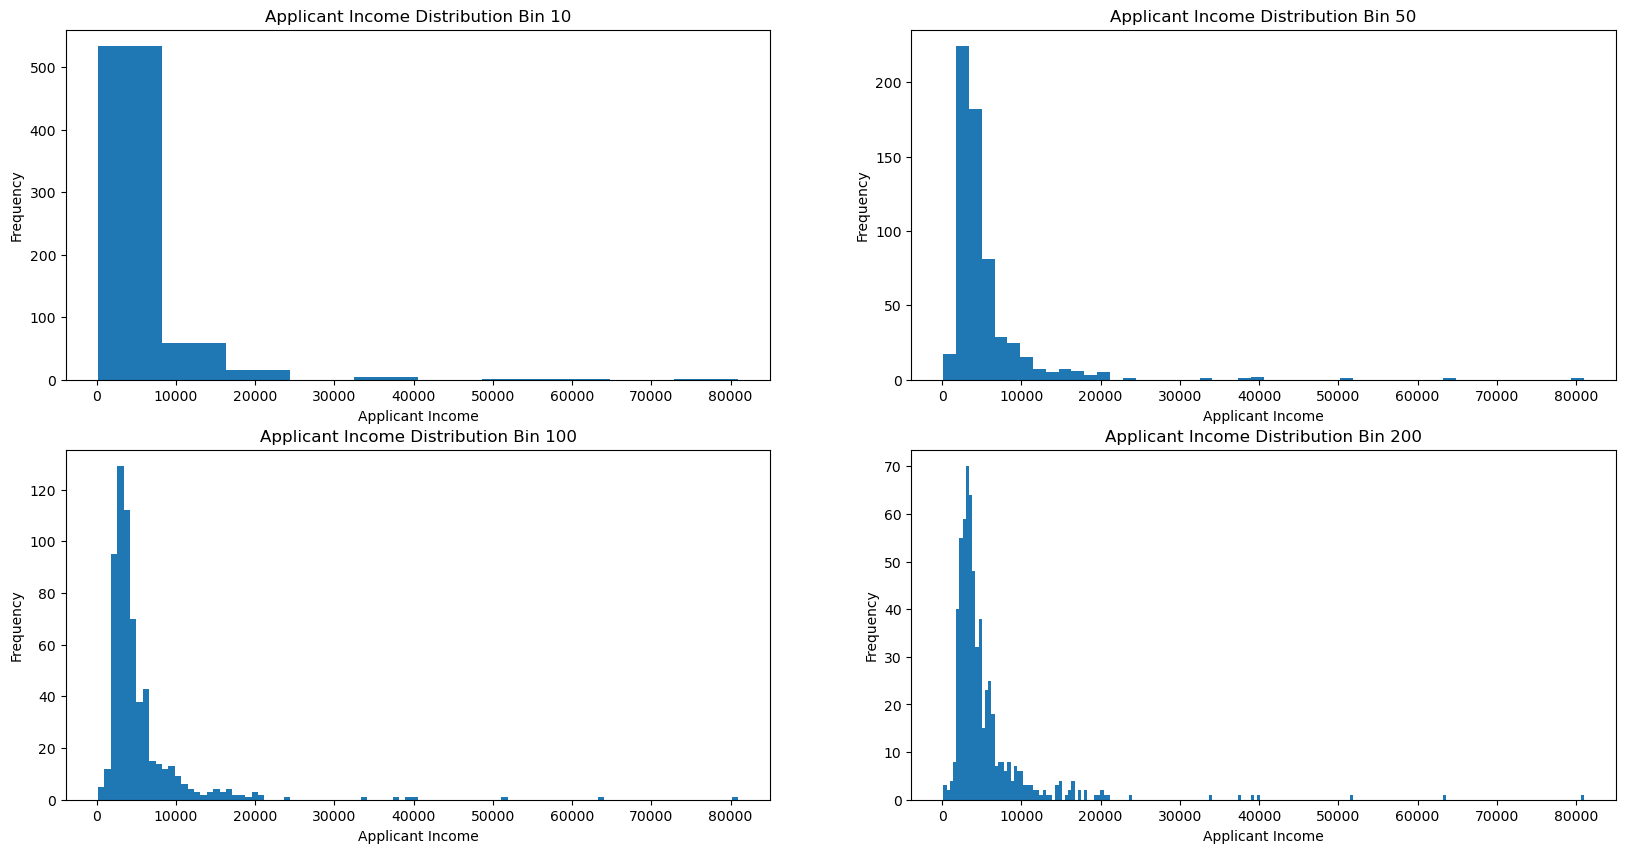

In [7]:
fig, axs = plt.subplots(2, 2, figsize=(20,10))
# bins 10
axs[0,0].hist(df['ApplicantIncome'], bins = 10)
axs[0,0].set_title('Applicant Income Distribution Bin 10')
axs[0,0].set_xlabel('Applicant Income')
axs[0,0].set_ylabel('Frequency')
# bins 50
axs[0,1].hist(df['ApplicantIncome'], bins = 50)
axs[0,1].set_title('Applicant Income Distribution Bin 50')
axs[0,1].set_xlabel('Applicant Income')
axs[0,1].set_ylabel('Frequency')
# bins 100
axs[1,0].hist(df['ApplicantIncome'], bins = 100)
axs[1,0].set_title('Applicant Income Distribution Bin 100')
axs[1,0].set_xlabel('Applicant Income')
axs[1,0].set_ylabel('Frequency')
# bins 200
axs[1,1].hist(df['ApplicantIncome'], bins = 200)
axs[1,1].set_title('Applicant Income Distribution Bin 200')
axs[1,1].set_xlabel('Applicant Income')
axs[1,1].set_ylabel('Frequency')

plt.show()


Look at box plots to understand the distributions. 

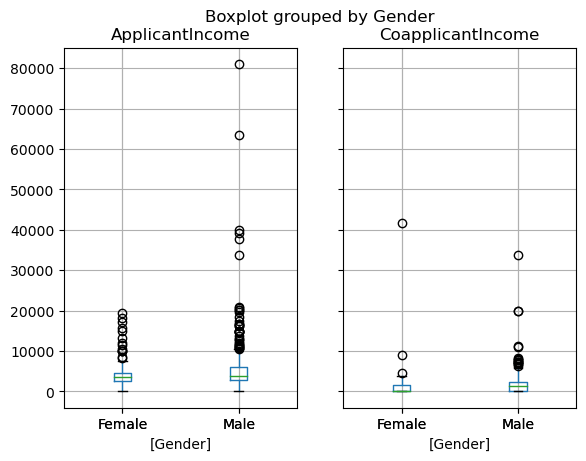

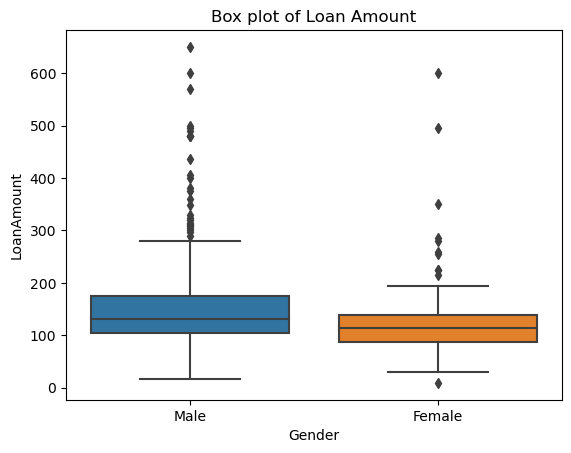

In [8]:
# Plot box plot of Applicant and Coapplicant Income
df.boxplot(column= ['ApplicantIncome', 'CoapplicantIncome'], by = ['Gender'])
plt.show()

# Plot box plot of LoanAmount
sns.boxplot(x = df['Gender'], y = df['LoanAmount'])
plt.title('Box plot of Loan Amount')
plt.show()

Look at the distribution of income segregated  by `Education`

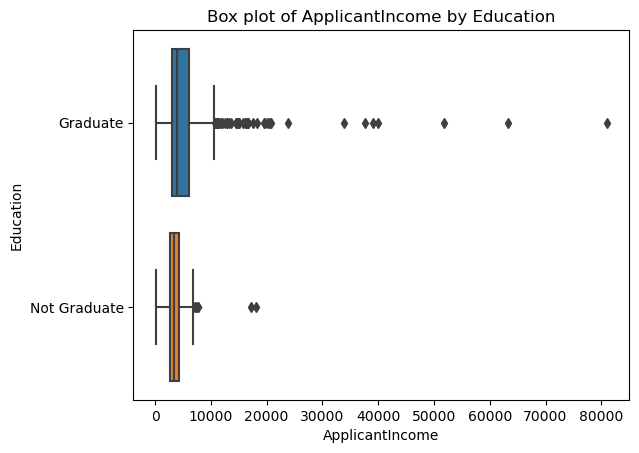

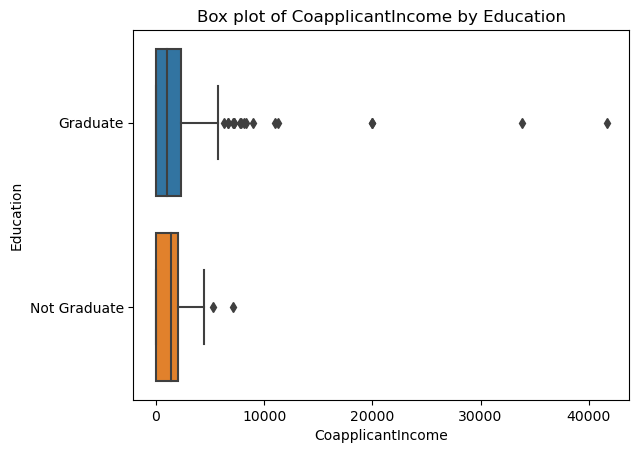

In [9]:
# Box plot Apllicant Income by Education
sns.boxplot(x =df['ApplicantIncome'], y = df['Education'])
plt.title('Box plot of ApplicantIncome by Education')
plt.show()
# Box plot Coapplicant Income by Education
sns.boxplot(x =df['CoapplicantIncome'], y = df['Education'])
plt.title('Box plot of CoapplicantIncome by Education')
plt.show()

Look at the histogram and boxplot of LoanAmount

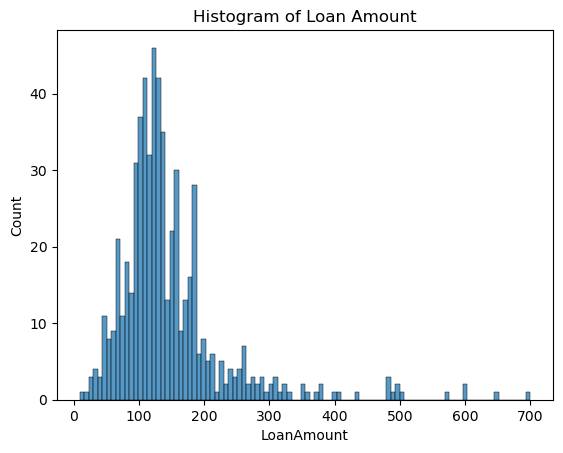

In [10]:
# Histogram of LoamAmount
sns.histplot(df['LoanAmount'], bins = 100)
plt.title('Histogram of Loan Amount')
plt.show()

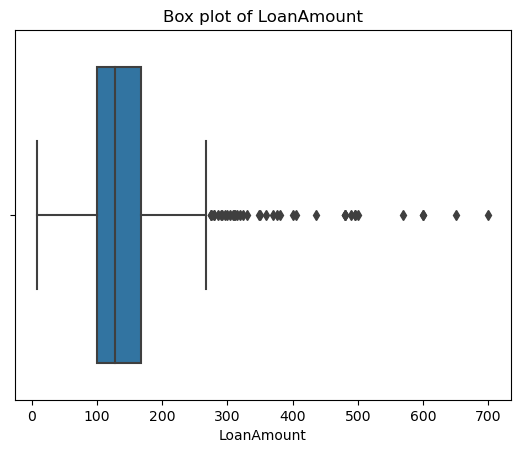

In [11]:
# Box plot of Loan Amount
sns.boxplot(x =df['LoanAmount'])
plt.title('Box plot of LoanAmount')
plt.show()

There might be some extreme values. Both `ApplicantIncome` and `LoanAmount` require some amount of data munging. `LoanAmount` has missing and well as extreme values values, while `ApplicantIncome` has a few extreme values, which demand deeper understanding. 

### Categorical variable analysis

Try to understand categorical variables in more details using `pandas.DataFrame.pivot_table` and some visualizations.

In [12]:
# Create pivot table
df_pivot = pd.pivot_table(df, index =['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area'], values = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Loan_Status'])
df_pivot

C:\Users\quang\AppData\Local\Temp\ipykernel_4820\4085569842.py:2: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  df_pivot = pd.pivot_table(df, index =['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area'], values = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Loan_Status'])


ApplicantIncome  \
Gender Married Dependents Education    Self_Employed Credit_History Property_Area                    
Female No      0          Graduate     No            0.0            Semiurban          3206.833333   
                                                                    Urban              3030.000000   
                                                     1.0            Rural              4376.888889   
                                                                    Semiurban          4714.000000   
                                                                    Urban              3998.111111   
...                                                                                            ...   
Male   Yes     3+         Not Graduate No            1.0            Rural              3088.000000   
                                                                    Semiurban          3031.333333   
                                                                    Urban              3992.000000   
                                       Yes           1.0            Rural              5703.000000   
                                                                    Urban              7100.000000   

                                                                                   CoapplicantIncome  \
Gender Married Dependents Education    Self_Employed Credit_History Property_Area                      
Female No      0          Graduate     No            0.0            Semiurban            1796.666667   
                                                                    Urban                 621.000000   
                                                     1.0            Rural                1061.777778   
                                                                    Semiurban             189.583333   
                                                                    Urban                 185.111111   
...                                                                                              ...   
Male   Yes     3+         Not Graduate No            1.0            Rural                 529.000000   
                                                                    Semiurban             579.000000   
                                                                    Urban                   0.000000   
                                       Yes           1.0            Rural                   0.000000   
                                                                    Urban                   0.000000   

                                                                                   LoanAmount  \
Gender Married Dependents Education    Self_Employed Credit_History Property_Area               
Female No      0          Graduate     No            0.0            Semiurban      115.666667   
                                                                    Urban           83.666667   
                                                     1.0            Rural          116.555556   
                                                                    Semiurban      125.833333   
                                                                    Urban           89.222222   
...                                                                                       ...   
Male   Yes     3+         Not Graduate No            1.0            Rural          122.333333   
                                                                    Semiurban       89.333333   
                                                                    Urban                 NaN   
                                       Yes           1.0            Rural          130.000000   
                                                                    Urban          125.000000   

                                                                                   Loan_Amount_Term  
Gender Married Dependents Education    

In [13]:
df.pivot_table(values = ['ApplicantIncome','LoanAmount','Loan_Amount_Term','Education','CoapplicantIncome'], index = 'Credit_History', aggfunc = np.mean)

C:\Users\quang\AppData\Local\Temp\ipykernel_4820\1524403184.py:1: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  df.pivot_table(values = ['ApplicantIncome','LoanAmount','Loan_Amount_Term','Education','CoapplicantIncome'], index = 'Credit_History', aggfunc = np.mean)


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
Credit_History,,,,
0.0,5679.438202,1542.179775,146.717647,341.927711
1.0,5426.526316,1528.250358,144.786026,342.192719


In [14]:
df.pivot_table(values = ['ApplicantIncome','LoanAmount','Loan_Amount_Term','Education','CoapplicantIncome'], index = 'Loan_Status', aggfunc = np.mean)

C:\Users\quang\AppData\Local\Temp\ipykernel_4820\3344287357.py:1: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  df.pivot_table(values = ['ApplicantIncome','LoanAmount','Loan_Amount_Term','Education','CoapplicantIncome'], index = 'Loan_Status', aggfunc = np.mean)


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
Loan_Status,,,,
N,5446.078125,1877.807292,151.220994,344.064516
Y,5384.068720,1504.516398,144.294404,341.072464


In [15]:
df.pivot_table(values = ['ApplicantIncome','LoanAmount','Loan_Amount_Term','Education','CoapplicantIncome'], index = 'Property_Area', aggfunc = np.mean)

C:\Users\quang\AppData\Local\Temp\ipykernel_4820\3192447857.py:1: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  df.pivot_table(values = ['ApplicantIncome','LoanAmount','Loan_Amount_Term','Education','CoapplicantIncome'], index = 'Property_Area', aggfunc = np.mean)


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
Property_Area,,,,
Rural,5554.083799,1645.536983,152.260116,345.531429
Semiurban,5292.261803,1520.133047,145.504386,347.113043
Urban,5398.247525,1716.350495,142.198953,332.800000


In [16]:
df.pivot_table(values = ['ApplicantIncome','LoanAmount','Loan_Amount_Term','Education','CoapplicantIncome'], index = 'Self_Employed', aggfunc = np.mean)

C:\Users\quang\AppData\Local\Temp\ipykernel_4820\2699980415.py:1: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  df.pivot_table(values = ['ApplicantIncome','LoanAmount','Loan_Amount_Term','Education','CoapplicantIncome'], index = 'Self_Employed', aggfunc = np.mean)


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
Self_Employed,,,,
No,5049.748000,1580.989840,141.748963,343.263804
Yes,7380.817073,1501.341463,172.000000,336.300000


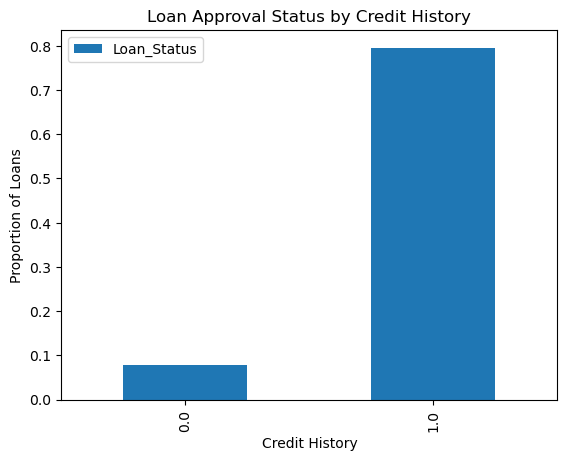

In [17]:
# Create pivot table of Loan_Status and Credit_History variables
loan_credit_history = pd.pivot_table(df, values='Loan_Status', index='Credit_History', columns=None, aggfunc=lambda x: x.replace({'Y':1, 'N':0}).mean())
# Plot stacked bar chart of loan approval status by credit history
loan_credit_history.plot(kind='bar', stacked=True)
plt.title('Loan Approval Status by Credit History')
plt.xlabel('Credit History')
plt.ylabel('Proportion of Loans')
plt.legend(loc='upper left')
plt.show()

## 3. Data Cleaning

This step typically involves imputing missing values and treating outliers. 

### Imputing Missing Values

Missing values may not always be NaNs. For instance, the `Loan_Amount_Term` might be 0, which does not make sense.



Impute missing values for all columns. Use the values which you find most meaningful (mean, mode, median, zero.... maybe different mean values for different groups)

In [18]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [19]:
# replace gender values with 1 and 0 and fill null values with median
df['Gender'] = df['Gender'].replace({"Male": 1, "Female": 0})
df['Gender'] = df['Gender'].fillna(df['Gender'].median())
# replace married values with 1 and 0 and fill null values with median
df['Married'] = df['Married'].replace({"Yes": 1, "No": 0})
df['Married'] = df['Married'].fillna(df['Married'].median())
# fill dependents null values with 0
df['Dependents'] = df['Dependents'].fillna(0)
# replace self employed values with 1 and 0 and fill null values with median
df['Self_Employed'] = df['Self_Employed'].replace({"Yes": 1, "No": 0})
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].median())
# fill loan amount null values with mean
df['LoanAmount'] = df['LoanAmount'].fillna(round(df['LoanAmount'].mean(),2))
# fill loan amount term null values with mean and change values into years
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Loan_Amount_Term'] = df['Loan_Amount_Term']/12
# replace loan status values with 1 and 0
df['Loan_Status'] = df['Loan_Status'].replace({"Y": 1, "N": 0})
# fill credit history null values with median
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].median())

# check null values again
df.isnull().sum()


Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### Extreme values
Try a log transformation to get rid of the extreme values in `LoanAmount`. Plot the histogram before and after the transformation

In [20]:
# Log transformation LoanAmount
df['LoanAmount_log'] = np.log(df['LoanAmount'])

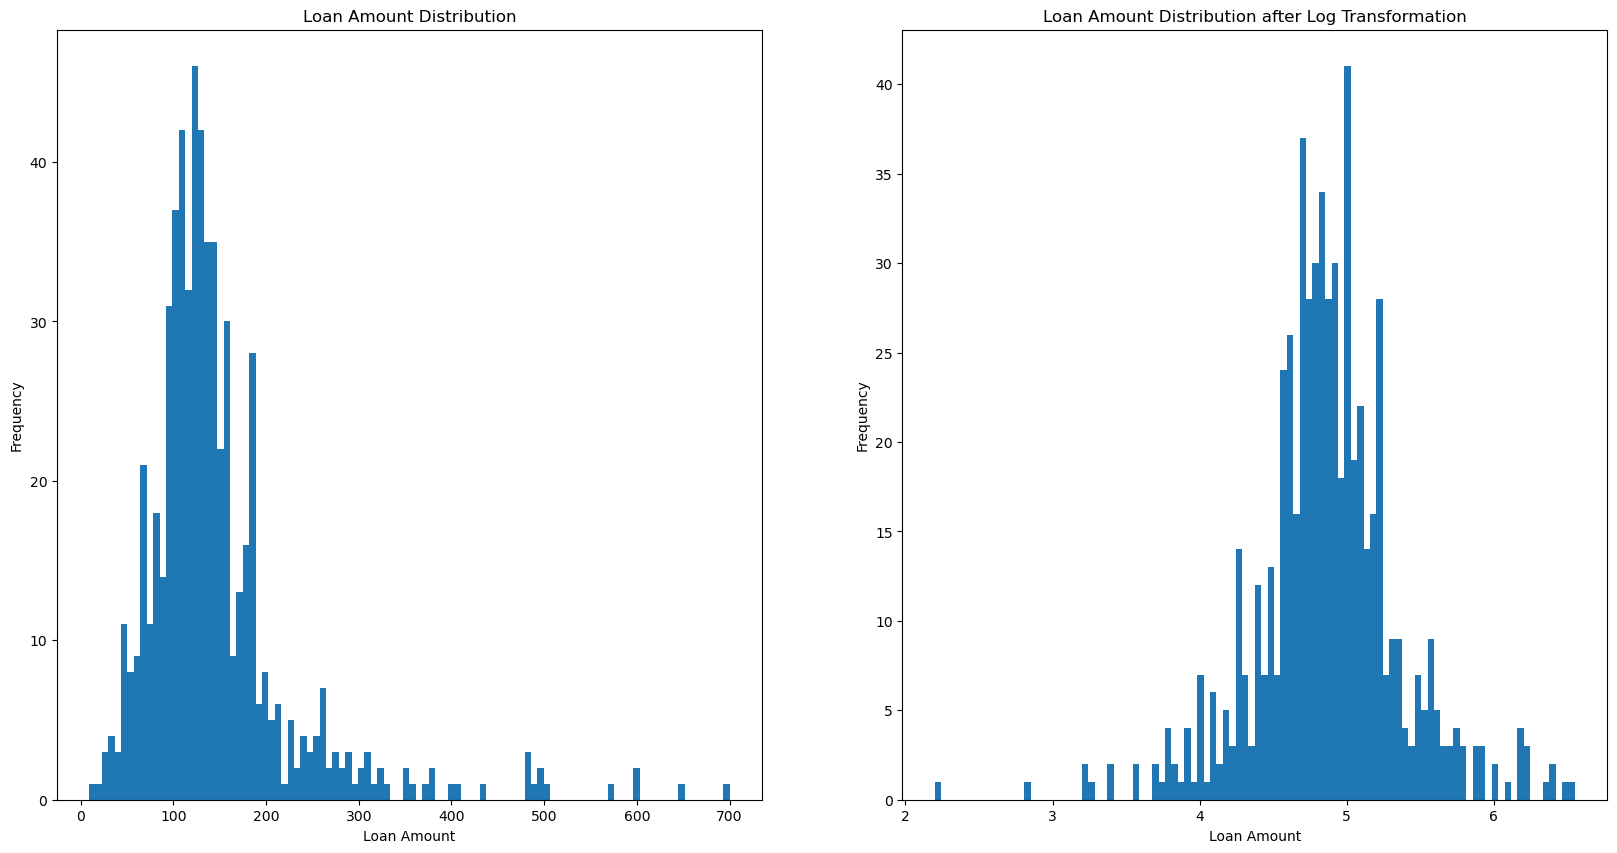

In [21]:
# Plot the histogram before and after the transformation
fig, axs = plt.subplots(1, 2, figsize=(20,10))
axs[0].hist(df['LoanAmount'], bins = 100)
axs[0].set_title('Loan Amount Distribution')
axs[0].set_xlabel('Loan Amount')
axs[0].set_ylabel('Frequency')
axs[1].hist(df['LoanAmount_log'], bins = 100)
axs[1].set_title('Loan Amount Distribution after Log Transformation')
axs[1].set_xlabel('Loan Amount')
axs[1].set_ylabel('Frequency')
plt.show()

Combine both incomes as total income and take a log transformation of the same.

In [22]:
# Create a new variable called TotalIncome
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']

In [23]:
# Log transformation TotalIncome
df['TotalIncome_log'] = np.log(df['TotalIncome'])

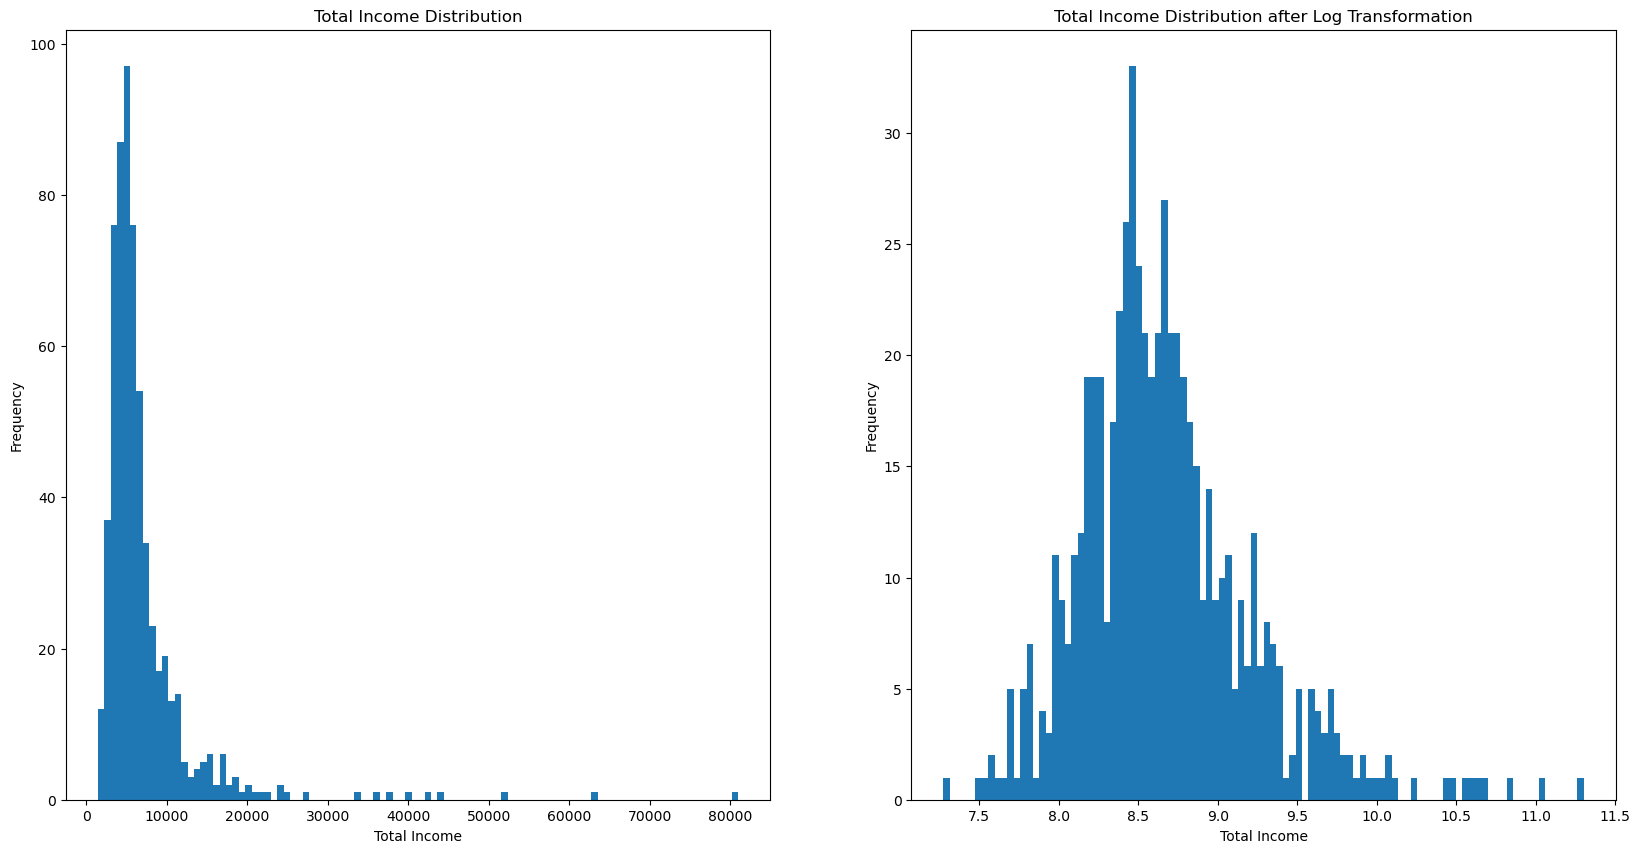

In [24]:
# Plot the histogram before and after the transformation
fig, axs = plt.subplots(1, 2, figsize=(20,10))
axs[0].hist(df['TotalIncome'], bins = 100)
axs[0].set_title('Total Income Distribution')
axs[0].set_xlabel('Total Income')
axs[0].set_ylabel('Frequency')
axs[1].hist(np.log(df['TotalIncome']), bins = 100)
axs[1].set_title('Total Income Distribution after Log Transformation')
axs[1].set_xlabel('Total Income')
axs[1].set_ylabel('Frequency')
plt.show()


## 4. Building a Predictive Model

In [25]:
# import train_test_split
from sklearn.model_selection import train_test_split
# import label encoder
from sklearn.preprocessing import LabelEncoder
# import one hot encoder
from sklearn.preprocessing import OneHotEncoder
# import standard scaler
from sklearn.preprocessing import StandardScaler
# import random forest classifier
from sklearn.ensemble import RandomForestClassifier
# import grid search
from sklearn.model_selection import GridSearchCV
# import confusion matrix
from sklearn.metrics import confusion_matrix
# import classification report
from sklearn.metrics import classification_report
# import logistic regression
from sklearn.linear_model import LogisticRegression


In [26]:
# Drop columns that are not needed for modeling
df_model = df.drop(['Loan_ID', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'TotalIncome'], axis = 1)
df_model

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome_log
0,1.0,0.0,0,Graduate,0.0,1.0,Urban,1,4.986411,8.674026
1,1.0,1.0,1,Graduate,0.0,1.0,Rural,0,4.852030,8.714568
2,1.0,1.0,0,Graduate,1.0,1.0,Urban,1,4.189655,8.006368
3,1.0,1.0,0,Not Graduate,0.0,1.0,Urban,1,4.787492,8.505323
4,1.0,0.0,0,Graduate,0.0,1.0,Urban,1,4.948760,8.699515
...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0,Graduate,0.0,1.0,Rural,1,4.262680,7.972466
610,1.0,1.0,3+,Graduate,0.0,1.0,Rural,1,3.688879,8.320205
611,1.0,1.0,1,Graduate,0.0,1.0,Urban,1,5.533389,9.025456
612,1.0,1.0,2,Graduate,0.0,1.0,Urban,1,5.231109,8.933664


In [27]:
# turn dependent variable into category
df_model['Dependents'] = df_model['Dependents'].astype('category')
# get dummies for categorical variables
df_model = pd.get_dummies(df_model, columns = ['Education','Property_Area','Dependents'])


In [28]:
df_model

,Gender,Married,Self_Employed,Credit_History,Loan_Status,LoanAmount_log,TotalIncome_log,Education_Graduate,Education_Not Graduate,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Dependents_0,Dependents_0,Dependents_1,Dependents_2,Dependents_3+
0,1.0,0.0,0.0,1.0,1,4.986411,8.674026,1,0,0,0,1,0,1,0,0,0
1,1.0,1.0,0.0,1.0,0,4.852030,8.714568,1,0,1,0,0,0,0,1,0,0
2,1.0,1.0,1.0,1.0,1,4.189655,8.006368,1,0,0,0,1,0,1,0,0,0
3,1.0,1.0,0.0,1.0,1,4.787492,8.505323,0,1,0,0,1,0,1,0,0,0
4,1.0,0.0,0.0,1.0,1,4.948760,8.699515,1,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.0,1.0,1,4.262680,7.972466,1,0,1,0,0,0,1,0,0,0
610,1.0,1.0,0.0,1.0,1,3.688879,8.320205,1,0,1,0,0,0,0,0,0,1
611,1.0,1.0,0.0,1.0,1,5.533389,9.025456,1,0,0,0,1,0,0,1,0,0
612,1.0,1.0,0.0,1.0,1,5.231109,8.933664,1,0,0,0,1,0,0,0,1,0


In [29]:
# define X and y
X = df_model.drop('Loan_Status', axis = 1)
# scale X
X = StandardScaler().fit_transform(X)
y = df_model['Loan_Status']
# split the data into train and test sets with 20% of the data in the test set and a random state of 30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 30)


In [30]:
# create a logistic regression model
logreg = LogisticRegression()
# fit the model
logreg.fit(X_train, y_train)
# predict on the test set
y_pred = logreg.predict(X_test)
# print the accuracy
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
# print precision, recall, f1-score and support
print(classification_report(y_test, y_pred))

Accuracy of logistic regression classifier on test set: 0.78
              precision    recall  f1-score   support

           0       0.81      0.35      0.49        37
           1       0.78      0.97      0.86        86

    accuracy                           0.78       123
   macro avg       0.79      0.66      0.68       123
weighted avg       0.79      0.78      0.75       123



In [31]:
# create a random forest classifier
rf = RandomForestClassifier()
# fit the model
rf.fit(X_train, y_train)
# predict on the test set
y_pred = rf.predict(X_test)
# print the accuracy
print('Accuracy of random forest classifier on test set: {:.2f}'.format(rf.score(X_test, y_test)))
# print precision, recall, f1-score and support
print(classification_report(y_test, y_pred))

Accuracy of random forest classifier on test set: 0.71
              precision    recall  f1-score   support

           0       0.52      0.41      0.45        37
           1       0.77      0.84      0.80        86

    accuracy                           0.71       123
   macro avg       0.64      0.62      0.63       123
weighted avg       0.69      0.71      0.70       123



Try paramater grid search to improve the results

In [32]:
# Define the hyperparameter grid to search over using grid search
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'penalty': ['l1', 'l2']}
# Train the logistic regression model using cross-validation to find the best hyperparameters
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)
# fit the model
logreg_cv.fit(X_train, y_train)
print("Best parameters:", logreg_cv.best_params_)

Best parameters: {'C': 1, 'penalty': 'l2'}


c:\Anaconda\envs\pandas_playground\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
35 fits failed out of a total of 70.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Anaconda\envs\pandas_playground\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Anaconda\envs\pandas_playground\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Anaconda\envs\pandas_playground\lib\site-packages\sklearn\linear_model\_logistic.py", line 54, in _

In [33]:
# Define the hyperparameter grid to search over using grid search for random forest
param_grid = {'n_estimators': [3, 5, 8, 20, 50], 'max_depth': [5, 8, 15, 25, 30], 'min_samples_split': [2, 5, 10, 15, 50], 'min_samples_leaf': [1, 2, 5, 10]}
# Train the random forest model using cross-validation to find the best hyperparameters
rf_cv = GridSearchCV(rf, param_grid, cv=5)
# fit the model
rf_cv.fit(X_train, y_train)
print("Best parameters:", rf_cv.best_params_)

Best parameters: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 15, 'n_estimators': 20}


## 5. Using Pipeline
If you didn't use pipelines before, transform your data prep, feat. engineering and modeling steps into Pipeline. It will be helpful for deployment.

The goal here is to create the pipeline that will take one row of our dataset and predict the probability of being granted a loan.

`pipeline.predict(x)`

In [34]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer


In [35]:
df_model.head()

,Gender,Married,Self_Employed,Credit_History,Loan_Status,LoanAmount_log,TotalIncome_log,Education_Graduate,Education_Not Graduate,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Dependents_0,Dependents_0,Dependents_1,Dependents_2,Dependents_3+
0,1.0,0.0,0.0,1.0,1,4.986411,8.674026,1,0,0,0,1,0,1,0,0,0
1,1.0,1.0,0.0,1.0,0,4.852030,8.714568,1,0,1,0,0,0,0,1,0,0
2,1.0,1.0,1.0,1.0,1,4.189655,8.006368,1,0,0,0,1,0,1,0,0,0
3,1.0,1.0,0.0,1.0,1,4.787492,8.505323,0,1,0,0,1,0,1,0,0,0
4,1.0,0.0,0.0,1.0,1,4.948760,8.699515,1,0,0,0,1,0,1,0,0,0


In [36]:
# Separate target from predictors, drop column that is not needed for modeling and encode target with label encoder
X = df.drop(['Loan_ID', 'Loan_Status'], axis=1)
X['Dependents'] = X['Dependents'].astype('str')
y = df['Loan_Status']

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

In [37]:
# Define the preprocessing pipeline
numerical_features = [col for col in X_train.columns if X_train[col].dtype in ['int64', 'float64']]
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

categorical_features = [col for col in X_train.columns if X_train[col].dtype in ['object']]
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output = False))])

preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, numerical_features),
    ('cat', categorical_transformer, categorical_features)])

# Define the logistic regression model
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', LogisticRegression())])

# fit model and predict
model.fit(X_train, y_train)
preds = model.predict(X_test)

In [38]:
# Define the hyperparameter grid to search over using grid search
param_grid = {'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'classifier__penalty': ['l1', 'l2']}
# Train the logistic regression model using cross-validation to find the best hyperparameters
model_cv = GridSearchCV(model, param_grid, cv=5)
# fit the model
model_cv.fit(X_train, y_train)
print("Best parameters:", model_cv.best_params_)
# predict on the test set
preds = model_cv.predict(X_test)
# print the accuracy
print('Accuracy of logistic regression classifier on test set:',round(model_cv.score(X_test, y_test),2))
# print precision, recall, f1-score and support
print(classification_report(y_test, preds))

Best parameters: {'classifier__C': 0.01, 'classifier__penalty': 'l2'}
Accuracy of logistic regression classifier on test set: 0.79
              precision    recall  f1-score   support

           0       0.87      0.35      0.50        37
           1       0.78      0.98      0.87        86

    accuracy                           0.79       123
   macro avg       0.82      0.66      0.68       123
weighted avg       0.80      0.79      0.76       123



c:\Anaconda\envs\pandas_playground\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
35 fits failed out of a total of 70.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Anaconda\envs\pandas_playground\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Anaconda\envs\pandas_playground\lib\site-packages\sklearn\pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\Anaconda\envs\pandas_playground\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _

## 6. Deploy your model to cloud and test it with PostMan, BASH or Python

In [39]:
import pickle

In [40]:
pickle.dump(model, open( "model.pkl", "wb" ) )